<h4 align="right">by <a href="http://cse.iitkgp.ac.in/~adas/">Abir Das</a> with help of <br> Ram Rakesh and Ankit Singh<br> </h4>

### Write the following details here
** Name: ** `Talluri Surya Teja`<br/>
** Roll Number: ** `15EE35028`<br/>
** Department: ** `Electrical Engineering`<br/>
** Email: ** `tsuryateja.iitkgp@gmail.com`

# Problem Set 1 

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`assignment_01.ipynb`]()) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

### Problem: You will implement the perceptron algorithm in this problem
We marked places where you are expected to add/change your own code with **`##### write your code below #####`** comment.

In [1]:
# Import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read training data from data_prob_01.txt and store in a numpy array called 'x'.
# As 40 data points are present, 'x' will be a 40x2 array where each row is one data point.
# Store the labels in 'y'. It will be 40 length numpy array.
# Each data is two dimensional and labels are +1 for the positive class while -1
# for the negative class
fileName="./data/data_prob_01.txt"
with open(fileName) as file:
    lines =  [line.split() for line in file ]
data = np.array(lines,dtype='float32')
X = data[:,:2]
y = data[:,-1]

In [3]:
# Initialize weight
w = np.array([0.0, 0.0]) #
# while no examples are misclassified run the perceptron algorithm (refer to the slides for the algorithm)
########################## write your code below ##############################################

n_epochs = 109
y[y == -1] = 0

lr = 0.001

for epoch in range(n_epochs):
    z = X.dot(w.reshape(-1,1))
    y_hat = 1/(1+np.exp(-z))
    
    loss = np.mean(np.array([y[i]*np.log(y_hat)[i,0]+(1-y[i])*(1-np.log(y_hat)[i,0]) for i in range(len(y))]))
    
    dz = y.reshape(-1, 1) - y_hat
    dw = X.T.dot(dz)/len(X)
    
    w -= lr*dw.reshape(2,)
        
    if epoch%5 ==0:
        print('For Epoch', epoch+1, 'Loss is: ', loss)
print('Final Loss:', loss)

# Finally w contains the trained weights
###############################################################################################

For Epoch 1 Loss is:  0.5
For Epoch 6 Loss is:  0.4818689844893288
For Epoch 11 Loss is:  0.46333566491827877
For Epoch 16 Loss is:  0.4443888516252361
For Epoch 21 Loss is:  0.4250174254654864
For Epoch 26 Loss is:  0.4052104181181935
For Epoch 31 Loss is:  0.38495710253176846
For Epoch 36 Loss is:  0.36424709327761046
For Epoch 41 Loss is:  0.34307045618433296
For Epoch 46 Loss is:  0.32141782616368336
For Epoch 51 Loss is:  0.29928053162938895
For Epoch 56 Loss is:  0.2766507233730792
For Epoch 61 Loss is:  0.2535215052272314
For Epoch 66 Loss is:  0.22988706335083275
For Epoch 71 Loss is:  0.20574279056114309
For Epoch 76 Loss is:  0.18108540184812766
For Epoch 81 Loss is:  0.1559130370875751
For Epoch 86 Loss is:  0.13022534704754557
For Epoch 91 Loss is:  0.10402355908083502
For Epoch 96 Loss is:  0.07731051941695452
For Epoch 101 Loss is:  0.05009070969473319
For Epoch 106 Loss is:  0.02237023627546575
Final Loss: 0.005500769609497502


### Scatter plot the data points and plot the straight line given by the trained weights w

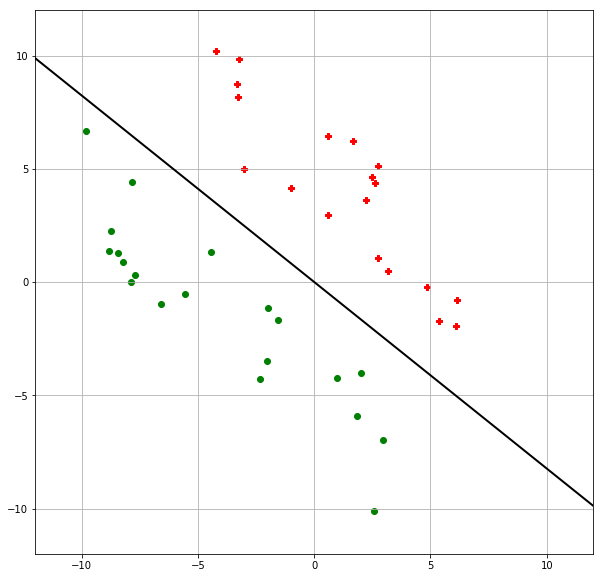

In [4]:
epsilon=1e-18
indexes_with_class1 = y==1
plt.figure(figsize=(10,10))
plt.scatter(X[indexes_with_class1][:,0],X[indexes_with_class1][:,1], color='r', marker='P')
plt.scatter(X[~indexes_with_class1][:,0],X[~indexes_with_class1][:,1], color='g', marker='o')
plt.grid()

# weightplot
plt.xlim(-12,12)
plt.ylim(-12,12)
slope = (-w[0])/(w[1]+epsilon) # to ensure no division by zero
xx = np.linspace(-15, 15)
yy = slope * xx
plt.plot(xx,yy,color='k', linestyle='-', linewidth=2)
plt.show()